In [33]:
import os
import sys
module_path = os.path.abspath( os.pardir)
if module_path not in sys.path:
    sys.path.append(module_path)
from src import data_download as dd
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.regression.linear_model import GLS
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
data_dict = dd.get_dataframes()

Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Parcel.zip
    
Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Residential%20Building.zip
    


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Real%20Property%20Sales.zip
    


/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2878: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Successfully downloaded ZIP file
    https://aqua.kingcounty.gov/extranet/assessor/Lookup.zip
    


In [49]:
data_dict.keys()

dict_keys(['parcel', 'res_bldg', 'rp_sale', 'lookup'])

In [35]:
ordinal_features, categorical_features = dd.get_tables(data_dict)

In [36]:
target = ordinal_features['SalePrice']
ordinal_features

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise
0,193000,0,1,1.0,7,1140,0,0,0,1760,1030,620,410,6,100,0,0,220,3,0,1,1,0,1,0,0,1980,0,3,0,9670,0,0,0,0,0,0,0,0,0,0,0,0,1
1,550000,0,1,3.0,8,370,650,0,0,1560,0,0,0,0,240,0,0,200,2,1,0,1,0,1,0,0,1985,0,3,0,2500,0,0,0,0,0,0,0,0,0,0,0,0,0
2,648500,0,1,2.0,8,1390,0,0,0,3300,0,0,0,0,590,0,0,0,5,1,0,2,1,0,0,0,2005,0,3,6000,5250,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1445000,0,1,2.0,9,2150,0,0,0,4920,0,0,0,0,490,300,0,0,5,2,1,3,1,0,0,0,2018,0,3,0,5499,0,0,0,0,0,0,0,0,0,0,0,0,0
4,785000,0,1,2.0,8,580,0,0,0,1540,560,350,210,8,0,0,0,110,3,1,2,1,1,0,0,0,1998,0,3,0,1313,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28296,669950,0,1,2.0,8,1193,0,0,0,2482,0,0,0,0,800,300,0,0,5,1,0,3,2,0,0,0,2018,0,3,0,11000,0,0,0,0,0,0,0,0,0,0,0,0,2
28297,1150000,0,1,1.5,7,1340,0,0,0,2910,850,850,0,7,0,0,0,140,4,0,1,1,0,1,0,0,1945,0,4,0,8360,0,0,0,0,0,0,0,0,0,0,0,0,0
28298,764500,25,1,1.0,8,1740,0,0,0,2900,1160,1160,0,7,0,230,0,0,4,1,0,1,0,1,0,1,1955,0,4,0,14889,0,0,0,0,0,0,0,0,0,0,0,0,0
28299,469000,0,1,2.0,9,1240,0,0,0,2420,0,0,0,0,510,40,0,0,4,1,0,2,0,1,0,0,1990,0,3,4610,6175,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
categorical_features

,SaleReason,PropertyClass,HeatSystem,HeatSource,PresentUse,HBUAsIfVacant,HBUAsImproved,WaterSystem,SewerSystem,Access,InadequateParking,StreetSurface,Topography,WfntLocation,WfntBank,WfntPoorQuality,WfntRestrictedAccess,WfntAccessRights,WfntProximityInfluence,TidelandShoreland,PowerLines,OtherNuisances,AdjacentGolfFairway,AdjacentGreenbelt
0,18,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
1,1,8,4,3,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
2,1,8,5,2,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
3,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
4,1,8,1,2,29,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28296,1,8,5,2,2,1,1,2,1,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
28297,1,8,5,1,2,1,1,2,2,4,0,1,0,0,0,0,0,N,N,0,N,N,N,N
28298,1,8,6,1,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N
28299,1,8,5,2,2,1,1,2,2,4,2,1,0,0,0,0,0,N,N,0,N,N,N,N


In [37]:
ordinal_features.corr()

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise
SalePrice,1.000000,0.069056,0.009405,0.287711,0.625155,0.352494,0.089020,0.002749,0.006446,0.600756,0.227445,0.240641,0.070703,0.201788,0.168924,0.293147,0.004030,0.201664,0.292941,0.200138,0.206773,0.336938,0.166897,0.162799,-0.061528,0.086597,0.126134,0.084823,-0.065275,0.098989,0.056683,0.021947,0.161289,0.120323,0.250041,0.142888,0.124937,0.214934,0.126426,0.039506,0.066007,0.046074,0.061224,0.004827
BrickStone,0.069056,1.000000,-0.004360,-0.121589,0.018619,0.046100,-0.025699,-0.001098,0.015254,0.005318,0.176519,0.127227,0.016792,0.095719,-0.098498,-0.042140,0.010958,-0.032946,-0.028020,-0.063702,0.030542,-0.080232,-0.065259,0.137929,-0.030407,0.181044,-0.186679,-0.007909,0.064963,-0.016552,-0.007157,0.030373,0.089029,0.041480,0.103295,0.029514,0.102947,0.054250,-0.008156,0.010850,-0.011770,0.005257,-0.002654,0.035453
NbrLivingUnits,0.009405,-0.004360,1.000000,0.011303,0.003185,0.024038,0.000179,0.005633,0.014814,0.038270,0.013122,0.021444,-0.000602,0.006972,0.012987,0.008172,0.008087,0.003062,0.037157,0.004390,0.035569,0.027693,-0.002612,-0.003687,-0.006348,0.007476,0.006575,0.015675,-0.010547,0.020071,0.005042,0.013616,0.022101,0.001247,0.007590,-0.004041,0.020386,-0.002162,-0.002995,-0.004246,0.004279,0.003854,-0.001220,0.004273
Stories,0.287711,-0.121589,0.011303,1.000000,0.498564,-0.204669,0.441516,0.003711,0.002206,0.368792,-0.282357,-0.249465,-0.089154,-0.134582,0.242654,0.212294,-0.017840,0.018039,0.209175,0.410475,0.002610,0.389707,0.144258,-0.073213,-0.113291,-0.283545,0.577257,-0.058057,-0.347794,0.137110,-0.034767,-0.015854,-0.022215,-0.006278,-0.012405,0.014251,-0.028925,-0.010462,0.003938,-0.011573,0.007472,-0.009256,0.012989,-0.016084
BldgGrade,0.625155,0.018619,0.003185,0.498564,1.000000,0.424432,0.109013,-0.004055,0.009424,0.724619,0.074935,0.122011,0.080366,0.131636,0.446244,0.326436,-0.018372,0.200063,0.403292,0.380489,0.178335,0.479597,0.311557,0.168443,-0.121603,0.037765,0.502347,-0.046226,-0.217070,0.210478,0.043943,0.035123,0.095701,0.095276,0.169344,0.081259,0.067974,0.099308,0.089962,0.002827,0.048197,0.007926,0.024248,-0.059700
SqFt1stFloor,0.352494,0.046100,0.024038,-0.204669,0.424432,1.000000,-0.183328,0.033882,0.036690,0.658137,0.099022,0.115945,0.025903,-0.083428,0.424713,0.308863,0.001974,0.133219,0.409626,0.079507,0.170111,0.284760,0.302967,0.162491,0.059144,0.189494,0.028703,0.048744,0.079993,0.095080,0.196197,0.071770,0.069679,0.086121,0.120933,0.024417,0.051532,0.066338,0.062330,0.034892,0.045448,0.042862,0.010564,-0.078244
SqFtUpperFloor,0.089020,-0.025699,0.000179,0.441516,0.109013,-0.183328,1.000000,0.001261,-0.005022,0.008948,-0.088300,-0.085189,-0.008496,-0.063387,-0.073176,-0.021728,0.007557,0.070963,-0.020113,0.043247,0.051215,0.036109,-0.038852,-0.072251,-0.032654,-0.064274,0.175958,-0.022565,-0.096835,0.009608,-0.035933,-0.000979,0.001595,0.005262,0.011272,0.022210,0.001432,0.005406,-0.002338,-0.001694,-0.010933,-0.006206,0.019601,0.035446
SqFtUnfinFull,0.002749,-0.001098,0.005633,0.003711,-0.004055,0.033882,0.001261,1.000000,0.012794,-0.001470,-0.002402,-0.010395,0.005938,-0.011987,0.016593,0.012322,0.005821,0.003715,-0.013370,-0.014193,0.006013,-0.011811,0.021042,-0.010478,0.002680,0.003852,-0.007196,0.011106,-0.012928,0.008774,0.037666,0.044641,-0.004176,0.030682,0.008661,-0.002525,-0.004403,-0.000165,-0.001872,-0.002653,-0.002269,-0.002034,-0.000762,0.002901
SqFtUnfinHalf,0.006446,0.015254,0.014814,0.002206,0.00942

In [38]:
SS = StandardScaler()
scaled_ords = pd.DataFrame(SS.fit_transform(ordinal_features))
scaled_ords.columns = ordinal_features.columns

In [39]:
scaled_ords

,SalePrice,BrickStone,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,AddnlCost,SqFtLot,MtRainier,Olympics,Cascades,Territorial,SeattleSkyline,PugetSound,LakeWashington,LakeSammamish,SmallLakeRiverCreek,OtherView,WfntFootage,LotDepthFactor,TrafficNoise
0,-1.330107,-0.197452,-0.048012,-1.032767,-0.638208,-0.220912,-0.167060,-0.030004,-0.03006,-0.433145,1.014842,0.760016,1.795142,0.862236,-0.582067,-0.637709,-0.158505,0.421456,-0.472273,-0.916270,0.718175,-0.841325,-1.031614,1.523388,-0.249505,-0.423925,0.047440,-0.224856,-0.623856,-0.266519,-0.114346,-0.089291,-0.139174,-0.159097,-0.302042,-0.084172,-0.14674,-0.131932,-0.062386,-0.08843,-0.075627,-0.067784,-0.025404,1.444509
1,-0.494806,-0.197452,-0.048012,2.636900,0.248998,-1.792674,6.396858,-0.030004,-0.03006,-0.645793,-0.809416,-0.663745,-0.457787,-0.799972,-0.093192,-0.637709,-0.158505,0.325983,-1.531530,0.987161,-0.822569,-0.841325,-1.031614,1.523388,-0.249505,-0.423925,0.204297,-0.224856,-0.623856,-0.266519,-0.236126,-0.089291,-0.139174,-0.159097,-0.302042,-0.084172,-0.14674,-0.131932,-0.062386,-0.08843,-0.075627,-0.067784,-0.025404,-0.362843
2,-0.264337,-0.197452,-0.048012,0.802066,0.248998,0.289400,-0.167060,-0.030004,-0.03006,1.204241,-0.809416,-0.663745,-0.457787,-0.799972,1.128995,-0.637709,-0.158505,-0.628742,1.646241,0.987161,-0.822569,0.556245,0.589112,-0.569144,-0.249505,-0.423925,0.831724,-0.224856,-0.623856,2.205162,-0.189418,-0.089291,-0.139174,-0.159097,-0.302042,-0.084172,-0.14674,-0.131932,-0.062386,-0.08843,-0.075627,-0.067784,-0.025404,-0.362843
3,1.599298,-0.197452,-0.048012,0.802066,1.136205,1.840750,-0.167060,-0.030004,-0.03006,2.926686,-0.809416,-0.663745,-0.457787,-0.799972,0.779799,1.797142,-0.158505,-0.628742,1.646241,2.890593,0.718175,1.953815,0.589112,-0.569144,-0.249505,-0.423925,1.239552,-0.224856,-0.623856,-0.266519,-0.185189,-0.089291,-0.139174,-0.159097,-0.302042,-0.084172,-0.14674,-0.131932,-0.062386,-0.08843,-0.075627,-0.067784,-0.025404,-0.362843
4,0.055043,-0.197452,-0.048012,0.802066,0.248998,-1.364012,-0.167060,-0.030004,-0.03006,-0.667058,0.182414,0.139991,0.696152,1.416305,-0.931263,-0.637709,-0.158505,-0.103643,-0.472273,0.987161,2.258920,-0.841325,0.589112,-0.569144,-0.249505,-0.423925,0.612125,-0.224856,-0.623856,-0.266519,-0.256287,-0.089291,-0.139174,-0.159097,-0.302042,-0.084172,-0.14674,-0.131932,-0.062386,-0.08843,-0.075627,-0.067784,-0.025404,-0.362843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27919,-0.214149,-0.197452,-0.048012,0.802066,0.248998,-0.112726,-0.167060,-0.030004,-0.03006,0.334512,-0.809416,-0.663745,-0.457787,-0.799972,1.862307,1.797142,-0.158505,-0.628742,1.646241,0.987161,-0.822569,1.953815,2.209839,-0.569144,-0.249505,-0.423925,1.239552,-0.224856,-0.623856,-0.266519,-0.091756,-0.089291,-0.139174,-0.159097,-0.302042,-0.084172,-0.14674,-0.131932,-0.062386,-0.08843,-0.075627,-0.067784,-0.025404,3.251861
27920,0.909062,-0.197452,-0.048012,-0.115351,-0.638208,0.187338,-0.167060,-0.030004,-0.03006,0.789578,0.696040,1.288186,-0.457787,1.139270,-0.931263,-0.637709,-0.158505,0.039565,0.586984,-0.916270,0.718175,-0.841325,-1.031614,1.523388,-0.249505,-0.423925,-1.050558,-0.224856,0.822674,-0.266519,-0.136596,-0.089291,-0.139174,-0.159097,-0.302042,-0.084172,-0.14674,-0.131932,-0.062386,-0.08843,-0.075627,-0.067784,-0.025404,-0.362843
27921,0.007077,1.379032,-0.048012,-1.032767,0.248998,1.003837,-0.167060,-0.030004,-0.03006,0.778946,1.245089,2.000067,-0.457787,1.139270,-0.931263,1.229010,-0.158505,-0.628742,0.586984,0.987161,-0.822569,-0.841325,-1.031614,1.523388,-0.2495

In [77]:
lr_rfe = LinearRegression()
select = RFE(lr_rfe, n_features_to_select=20)
select = select.fit(X = scaled_ords.drop('SalePrice', axis=1), y = target)
predictors = scaled_ords[scaled_ords.columns[[True] + list(select.support_) ]]
predictors['SalePrice'] = target.values
predictors = predictors.drop('SqFt1stFloor', axis= 1)
predictors

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,SalePrice,Stories,BldgGrade,SqFtUpperFloor,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,SqFtGarageBasement,FinBasementGrade,SqFtGarageAttached,SqFtOpenPorch,Bedrooms,Bath3qtrCount,BathFullCount,YrBuilt,AddnlCost,Olympics,SeattleSkyline,LakeWashington,LakeSammamish
0,193000,-1.032767,-0.638208,-0.167060,-0.433145,1.014842,0.760016,1.795142,0.862236,-0.582067,-0.637709,-0.472273,0.718175,-0.841325,0.047440,-0.266519,-0.139174,-0.084172,-0.131932,-0.062386
1,550000,2.636900,0.248998,6.396858,-0.645793,-0.809416,-0.663745,-0.457787,-0.799972,-0.093192,-0.637709,-1.531530,-0.822569,-0.841325,0.204297,-0.266519,-0.139174,-0.084172,-0.131932,-0.062386
2,648500,0.802066,0.248998,-0.167060,1.204241,-0.809416,-0.663745,-0.457787,-0.799972,1.128995,-0.637709,1.646241,-0.822569,0.556245,0.831724,2.205162,-0.139174,-0.084172,-0.131932,-0.062386
3,1445000,0.802066,1.136205,-0.167060,2.926686,-0.809416,-0.663745,-0.457787,-0.799972,0.779799,1.797142,1.646241,0.718175,1.953815,1.239552,-0.266519,-0.139174,-0.084172,-0.131932,-0.062386
4,785000,0.802066,0.248998,-0.167060,-0.667058,0.182414,0.139991,0.696152,1.416305,-0.931263,-0.637709,-0.472273,2.258920,-0.841325,0.612125,-0.266519,-0.139174,-0.084172,-0.131932,-0.062386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27919,669950,0.802066,0.248998,-0.167060,0.334512,-0.809416,-0.663745,-0.457787,-0.799972,1.862307,1.797142,1.646241,-0.822569,1.953815,1.239552,-0.266519,-0.139174,-0.084172,-0.131932,-0.062386
27920,1150000,-0.115351,-0.638208,-0.167060,0.789578,0.696040,1.288186,-0.457787,1.139270,-0.931263,-0.637709,0.586984,0.718175,-0.841325,-1.050558,-0.266519,-0.139174,-0.084172,-0.131932,-0.062386
27921,764500,-1.032767,0.248998,-0.167060,0.778946,1.245089,2.000067,-0.457787,1.139270,-0.931263,1.229010,0.586984,-0.822569,-0.841325,-0.736844,-0.266519,-0.139174,-0.084172,-0.131932,-0.062386
27922,469000,0.802066,1.136205,-0.167060,0.268591,-0.809416,-0.663745,-0.457787,-0.799972,0.849638,-0.313062,0.586984,-0.822569,0.556245,0.361154,1.632556,-0.139174,-0.084172,-0.131932,-0.062386


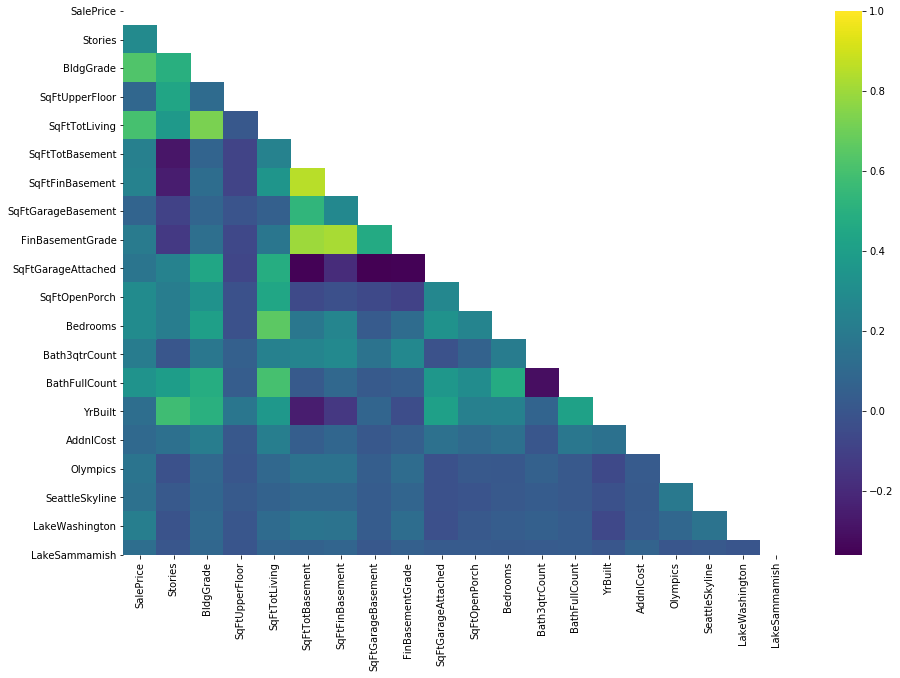

In [78]:
mask = np.triu(np.ones_like(predictors.corr(), dtype=np.bool))
fig, ax = plt.subplots(figsize = (15,10))
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
sns.heatmap(predictors.corr(), mask= mask, ax= ax, cmap = 'viridis')

In [79]:
preds = 'SalePrice ~ ' + str(predictors.columns[1])
for pred in predictors.columns[2:]:
    preds = preds + f' + {pred}'
formula = preds

model = smf.ols(preds, predictors).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.545
Model:                            OLS   Adj. R-squared:                  0.545
Method:                 Least Squares   F-statistic:                     1760.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:32:46   Log-Likelihood:            -3.9067e+05
No. Observations:               27924   AIC:                         7.814e+05
Df Residuals:                   27904   BIC:                         7.816e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           7.615e+05   1725.700    441.256      0.000    7.58e+05    7.65e+05
Stories             1.878e+04   2813.964      6.673      0.000    1.33e+04    2.43e+04
BldgGrade           1.954e+05   2949.412     66.263      0.000     1.9e+05    2.01e+05
SqFtUpperFloor      1.553e+04   2027.470      7.658      0.000    1.16e+04    1.95e+04
SqFtTotLiving       1.616e+05   4148.898     38.955      0.000    1.53e+05     1.7e+05
SqFtTotBasement     1.917e+04   4621.944      4.148      0.000    1.01e+04    2.82e+04
SqFtFinBasement    -4.651e+04   4939.059     -9.416      0.000   -5.62e+04   -3.68e+04
SqFtGarageBasement -2.352e+04   2591.645     -9.075      0.000   -2.86e+04   -1.84e+04
FinBasementGrade     3.16e+04   3891.778      8.120      0.000     2.4e+04    3.92e+04
SqFtGarageAttached -5.504e+04   2662.757    -20.670      0.000   -6.03e+04   -4.98e+04
SqFtOpenPorch       2.316e+04   1991.401     11.631      0.000    1.93e+04    2.71e+04
Bedrooms           -4.982e+04   2399.529    -20.762      0.000   -5.45e+04   -4.51e+04
Bath3qtrCount       4.181e+04   2344.741     17.832      0.000    3.72e+04    4.64e+04
BathFullCount       4.075e+04   2889.017     14.106      0.000    3.51e+04    4.64e+04
YrBuilt                -1e+05   2649.719    -37.749      0.000   -1.05e+05   -9.48e+04
AddnlCost          -1.952e+04   1785.823    -10.929      0.000    -2.3e+04    -1.6e+04
Olympics            1.911e+04   1791.629     10.668      0.000    1.56e+04    2.26e+04
SeattleSkyline      2.102e+04   1782.242     11.796      0.000    1.75e+04    2.45e+04
LakeWashington       4.15e+04   1784.999     23.250      0.000     3.8e+04     4.5e+04
LakeSammamish         2.6e+04   1742.248     14.922      0.000    2.26e+04    2.94e+04
==============================================================================
Omnibus:                     8160.964   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            49926.858
Skew:                           1.265   Prob(JB):                         0.00
Kurtosis:                       9.042   Cond. No.                         7.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
model.params.sort_values()

YrBuilt              -102493.267077
SqFtFinBasement       -66755.952787
SqFtGarageAttached    -54835.368184
Bedrooms              -51801.285278
SqFt1stFloor          -50124.553445
SqFtGarageBasement    -21376.714414
AddnlCost             -19744.709421
Stories               -19534.624584
SqFtTotBasement        18490.937394
Olympics               19361.556856
SqFtUpperFloor         20360.799648
SeattleSkyline         20885.922100
SqFtOpenPorch          21558.295731
LakeSammamish          26460.411904
FinBasementGrade       28259.225420
BathFullCount          39747.155143
LakeWashington         41530.709351
Bath3qtrCount          43503.427812
BldgGrade             202510.331087
SqFtTotLiving         214343.229321
Intercept             761475.284737
dtype: float64

In [71]:
preds = 'SalePrice ~ ' + str(predictors_not_scaled.columns[1])
for pred in predictors_not_scaled.columns[2:]:
    preds = preds + f' + {pred}'
formula = preds

model = smf.ols(preds, predictors_not_scaled).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.457
Method:                 Least Squares   F-statistic:                     1175.
Date:                Wed, 30 Sep 2020   Prob (F-statistic):               0.00
Time:                        12:12:38   Log-Likelihood:            -3.9314e+05
No. Observations:               27924   AIC:                         7.863e+05
Df Residuals:                   27903   BIC:                         7.865e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -8.943e+05   4.05e+04    -22.093      0.000   -9.74e+05   -8.15e+05
NbrLivingUnits      -9034.7040   3.73e+04     -0.242      0.808   -8.21e+04     6.4e+04
BldgGrade            1.889e+05   2394.529     78.878      0.000    1.84e+05    1.94e+05
FinBasementGrade     7120.8333    591.584     12.037      0.000    5961.300    8280.367
Bedrooms            -5677.1533   2584.839     -2.196      0.028   -1.07e+04    -610.742
BathHalfCount       -2956.4541   4094.374     -0.722      0.470    -1.1e+04    5068.719
Bath3qtrCount        8.282e+04   3869.627     21.402      0.000    7.52e+04    9.04e+04
BathFullCount        7.906e+04   3930.542     20.114      0.000    7.14e+04    8.68e+04
FpSingleStory        1.045e+04   3905.913      2.677      0.007    2798.542    1.81e+04
FpMultiStory         3.153e+04   5460.613      5.774      0.000    2.08e+04    4.22e+04
FpAdditional        -1.403e+04   6287.660     -2.231      0.026   -2.64e+04   -1704.584
MtRainier           -1.963e+04   8310.974     -2.362      0.018   -3.59e+04   -3339.488
Olympics             4.819e+04   6930.802      6.953      0.000    3.46e+04    6.18e+04
Cascades            -1023.5176   5272.778     -0.194      0.846   -1.14e+04    9311.385
SeattleSkyline       1.004e+05   8632.651     11.625      0.000    8.34e+04    1.17e+05
PugetSound           5.328e+04   6551.499      8.132      0.000    4.04e+04    6.61e+04
LakeWashington       1.686e+05   6009.718     28.048      0.000    1.57e+05     1.8e+05
LakeSammamish        1.759e+05   1.15e+04     15.364      0.000    1.53e+05    1.98e+05
SmallLakeRiverCreek  6.447e+04   7184.549      8.974      0.000    5.04e+04    7.86e+04
OtherView            3.752e+04   1.08e+04      3.488      0.000    1.64e+04    5.86e+04
TrafficNoise         2.558e+04   3437.441      7.442      0.000    1.88e+04    3.23e+04
==============================================================================
Omnibus:                     8150.924   Durbin-Watson:                   1.875
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            35118.307
Skew:                           1.379   Prob(JB):                         0.00
Kurtosis:                       7.752   Cond. No.                         270.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
model.params.sort_values()

Intercept             -894332.129434
MtRainier              -19629.403889
FpAdditional           -14028.705659
NbrLivingUnits          -9034.703951
Bedrooms                -5677.153336
BathHalfCount           -2956.454051
Cascades                -1023.517635
FinBasementGrade         7120.833329
FpSingleStory           10454.323680
TrafficNoise            25580.981047
FpMultiStory            31531.142061
OtherView               37517.135472
Olympics                48190.016451
PugetSound              53279.304161
SmallLakeRiverCreek     64472.020180
BathFullCount           79060.601945
Bath3qtrCount           82818.224591
SeattleSkyline         100353.014743
LakeWashington         168560.528648
LakeSammamish          175920.837534
BldgGrade              188876.843754
dtype: float64